In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('annual-number-of-deaths-by-cause.csv')

# 1. Remove rows with null values
df_cleaned = df.dropna()

# 2. Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# 3. Export the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_annual-number-of-deaths-by-causeV2.csv', index=False)

print("Data cleaning completed. Cleaned file saved as 'cleaned_annual-number-of-deaths-by-causeV2.csv'.")


Data cleaning completed. Cleaned file saved as 'cleaned_annual-number-of-deaths-by-causeV2.csv'.


Top 5 Causes of Deaths over years

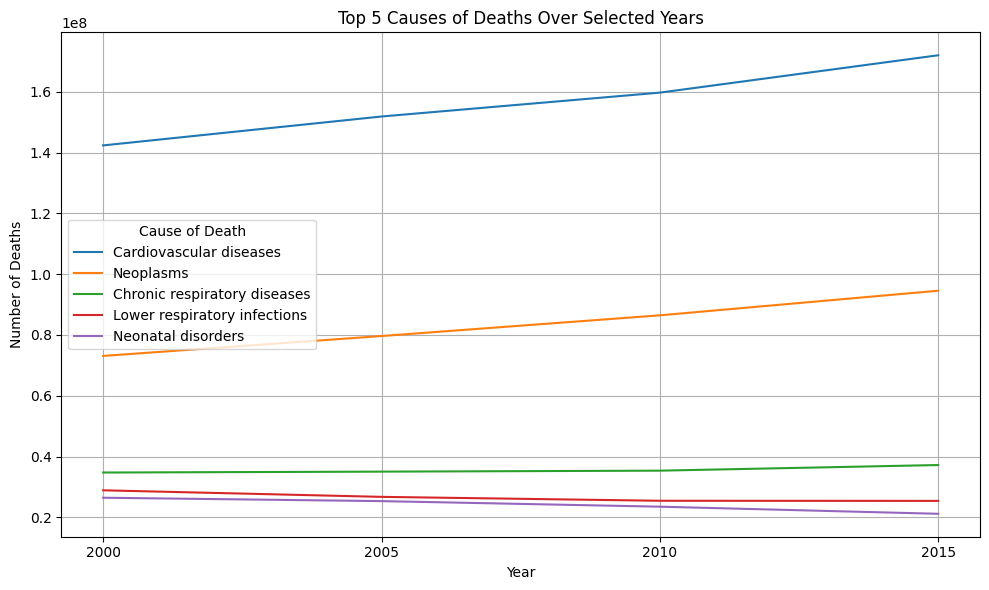

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('annual-number-of-deaths-by-cause.csv')

# Select columns related to death causes (excluding "Entity", "Code", "Year", and unrelated columns)
death_columns = [col for col in df.columns if 'Deaths' in col]

# Group the data by year and sum death counts across all countries for each year
grouped_data = df.groupby('Year')[death_columns].sum()

# Select certain years for plotting (e.g., every 5 years)
selected_years = grouped_data.loc[[2000, 2005, 2010, 2015]]

# Sort the total deaths by cause to identify the top 5 causes
top_causes = selected_years.sum().nlargest(5).index

# Plot a line graph of the top 5 causes of death across selected years
plt.figure(figsize=(10, 6))
for cause in top_causes:
    plt.plot(selected_years.index, selected_years[cause], label=cause.split(' - ')[1])

plt.title('Top 5 Causes of Deaths Over Selected Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause of Death')
plt.xticks(selected_years.index)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


List of Deaths per disease

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('annual-number-of-deaths-by-cause.csv')

# Identify all death-related columns (ignoring "Entity", "Code", and "Year")
death_columns = [col for col in df.columns if 'Deaths' in col]

# Filter data for years 1990 to 2019
filtered_data = df[(df['Year'] >= 1990) & (df['Year'] <= 2019)]

# Group by year and sum the number of deaths for each cause
grouped_data = filtered_data.groupby('Year')[death_columns].sum()

# Output the data as a table for each death cause
for cause in death_columns:
    print(f"Table for {cause.split(' - ')[1]}")
    print(grouped_data[[cause]])
    print("\n")


Exploratory Data Analysis

In [ ]:
# import pip

# pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('annual-number-of-deaths-by-cause.csv')

# Identify all death-related columns (ignoring "Entity", "Code", and "Year")
death_columns = [col for col in df.columns if 'Deaths' in col]

# Filter data for years 1990 to 2019
filtered_data = df[(df['Year'] >= 1990) & (df['Year'] <= 2019)]

# Group by year and sum the number of deaths for each cause
grouped_data = filtered_data.groupby('Year')[death_columns].sum()

# Set a professional style using seaborn
sns.set(style="whitegrid")

# Loop through each death cause and plot a line chart
for cause in death_columns:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    sns.lineplot(x=grouped_data.index, y=grouped_data[cause], color='b', linewidth=2.5)
    
    # Add chart title and labels
    plt.title(f"Deaths from {cause.split(' - ')[1]} (1990-2019)", fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Deaths', fontsize=12)
    
    # Customize grid, ticks, and layout for a clean appearance
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Adjust layout to avoid clipping of labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()
